# Molecular Simulations (0351-4057) Final Assignment

**Yotam Gomeh - 323823971 \
Yehonatan Barda - 327569174**

The full GitHub reposotry can be found [here](https://github.com/YehonathanBarda/Molecular-Simulations-Final-Project-Barda-and-Yotam).

## Question 1

We chose to implement Path Integral Molecular Dymanics (PIMD).

## Question 2

The standart Molecular Dynamics (MD) simulations that we have conducted up until now, fail to capture quantum effetcs that are wished to be described in certain simulated systems. Moreover, complex quantum systems cannot be solved analytically and are very hard to be directly simulated since it involves solving numerically a highly complex partial differential equation which holds many degrees of freedom.

## Question 3

The PIMD formalism states that when a particle evolves unobserved from point $x$ to $ x ^\prime$, the particle follows all possible path between $x$ and $x^\prime$ simultaneously and the total amplitude for the particle at $x^\prime$ at time $t$ is the sum of the amplitude associated with all possible paths between $x$ and $x^\prime$.

The amplitude of a particle that started at point $x$ after time $t$ at point $x^\prime$ is given by the matrix element of the propagator $\hat{U}=\exp\left\{ -i\hat{\mathcal{H}}t/\hbar\right\}$ (in the possiton basis):

$$
A= \left\langle x^\prime  \right| \hat{U} (t) \left|x\right\rangle  =\left\langle x^\prime  \right| e^{-i\mathcal{\hat{H}t/h}} \left|x\right\rangle \equiv U\left(x,x^\prime,t \right)
$$

By substituting in the propagator $t \rightarrow it/\hbar$ the quantum propagator turns into the classic canonical density matrix:
$$
\hat{\rho}(\beta) = \exp(-\beta \hat{\mathcal{H}}) \Rightarrow \hat{U} = \hat{\rho}(it/\hbar)
$$
and the matrix elements are given by:
$$
\rho \left(x^\prime , x, \beta \right) \equiv \left\langle x^\prime  \right| e^{-\beta\mathcal{\hat{H}}} \left|x\right\rangle = \lim _{P \to \infty} \left(\frac{mP}{2 \pi \beta \hbar ^2}\right) ^{P/2} \int dx_2 \ldots dx_P \times \exp \left\{ -\frac{1}{\hbar} \sum_{k=1}^{P} \left[ \frac{mP}{2\beta \hbar} (x_{k+1} - x_k)^2 + \frac{\beta \hbar}{2P} \left( V(x_{k+1} + V(x_k)) \right) \right] \right\} \Bigg|^{x_{P+1} = x^\prime}_{x_1 = x}
$$

The canonical partion function for this classical system can be caluletded:
$$
Z = \text{Tr}\left\{e^{-\beta\hat{\mathcal{H}}}\right\} = \lim _{P \to \infty} \left(\frac{mP}{2 \pi \beta \hbar ^2}\right) ^{P/2} \int _{D(L)} dx_1 \ldots dx_P \times \exp \left\{ -\frac{1}{\hbar} \sum_{k=1}^{P} \left[ \frac{mP}{2\beta \hbar} (x_{k+1} - x_k)^2 + \frac{\beta \hbar}{P} V(x_k) \right] \right\} \Bigg|_{x_{P+1} = x_1}
$$

where the quantum system (with its Hamiltonian) is mapped onto a classical sytem comprised of $P \to \infty$ "beads" where each pair of beads is connected in a ring via springs with frequency $\omega _P = \frac{P}{\beta \hbar}$ and external potenital $V(x)$
___

### Analyltic solultion for harmonic oscillator
for harmonic external potemtial $V(x) = \frac{1}{2} m \omega_0 ^2 x^2$ the partition function is given by (eq. 3.40 in the PIMC notes): 
$$
Z (\beta) = \frac{1}{2\sinh(\frac{\hbar\omega_0}{2}\beta)}.
$$

Now, the expction value for the energy can be calculted:

$$
\langle E\rangle=-\frac{\partial}{\partial\beta}Z=\frac{\hbar\omega_0}{2}\coth\left(\frac{\hbar\omega_0}{2}\beta\right).
$$
___
### Numerical solultion for harmonic oscillator

#### The algorithem:

first let us define the transformation matrix to normal modes representation (P is even):

$$
C_{jk}=\begin{cases}
\sqrt{1/P} & k=0\\
\sqrt{2/P}\cos\left(2\pi jk/P\right) & 1\le k\le P/2-1\\
\sqrt{1/P}\left(-1\right)^{j} & k=P/2\\
\sqrt{2/P}\sin\left(2\pi jk/P\right) & P/2+1\le k\le P-1
\end{cases}
$$
Where $k: 0 \to P-1$ and $j: 1 \to P$.

The algoritem for time propagtion under constant energy (_Micro-Canonical ensamble_) is given by:

1. Exact evolution of the ring polymer momenta through a time interval $\Delta t/2$ under the external potential:

$$
p_j \leftarrow p_j + F_j \frac{\Delta t}{2}
$$

Where $F_{j}=-\frac{\partial V}{\partial x_{j}}$ is the force acting of the $j$'th bead

2. Transforming to noraml modes representation:
$$
\vec{\widetilde{p}}\leftarrow C_{jk}\cdot\vec{p}
$$

$$
\vec{\widetilde{x}}\leftarrow C_{jk}\cdot\vec{x}
$$

Where $\vec{x}$ and $\vec{p}$ are the possition abd momenta vector (Explain??).

3. Exact evaluation of the ring polymer coordinates and momenta through a time interval $\Delta t/2$ under the influence of a free ring polymer Hamiltonian:

$$
\begin{pmatrix}\widetilde{p}_{k}\\
\widetilde{x}_{k}
\end{pmatrix}\leftarrow\begin{pmatrix}\cos\omega_{k}\Delta t & -m\omega_{k}\sin\omega_{k}\Delta t\\
\frac{1}{m\omega_{k}}\sin\omega_{k}\Delta t & \cos\omega_{k}\Delta t
\end{pmatrix}\begin{pmatrix}\widetilde{p}_{k}\\
\widetilde{x}_{k}
\end{pmatrix}
$$

Where $\omega _k \equiv 2 \omega _ P \sin(k \pi /P)$
4. Transforming back to beads representation:
$$
\vec{p}\leftarrow C^T_{jk}\cdot\vec{\widetilde{p}}
$$

$$
\vec{x}\leftarrow C^T_{jk}\cdot\vec{\widetilde{x}}
$$

5.  Antother exact evolution of the ring polymer momenta through a time interval $\Delta t/2$ under the external potential:

$$
p_j \leftarrow p_j + F_j \frac{\Delta t}{2}
$$

In order to propigate the ring polymer under consteant temperature (_Canonical ensamble_) we will thermostat the normal modes by applying steps (6-8) before and after the previus propagtion steps (1-5):

6. Transforming the momenta to the noraml modes representation:

$$
\vec{\widetilde{p}}\leftarrow C_{jk}\cdot\vec{p}
$$

7. Thermosatating the normal modes:
$$
\widetilde{p}_{j}\leftarrow e^{-\frac{\Delta t}{2}\gamma_{k}}\cdot\widetilde{p}_{j}+\sqrt{\frac{mP}{\beta}\left(1-e^{\Delta t\gamma_{k}}\right)}\xi_{k}
$$

Where: $\gamma_{k}=\begin{cases}\frac{1}{100\Delta t} & k=0\\2\omega_{k} & k\ge1\end{cases}$ and $\xi_{k}$ is a standard normal distributed number (zero mean and unit variance)

8. Transforming the momenta back to the beads representation:
$$
\vec{p}\leftarrow C^T_{jk}\cdot\vec{\widetilde{p}}
$$

#### Energy estimator

In order to evaluate the energy for the quantum particle, we will use the virial energy estimator (Tukerman eq 12.6.33):
$$
\varepsilon_{vir}\left(x_{1},\ldots,x_{P}\right)=\frac{1}{P}\sum_{k=1}^{P}\left[\frac{1}{2}x_{k}\frac{\partial V}{\partial x_{k}}+V\left(x_{k}\right)\right]
$$

Substituting the harmonic oscillator potential energy $V(x_k) = \frac{1}{2} m \omega_0 ^2 x_k^2$ we get:

$$
\varepsilon_{vir}\left(x_{1},\ldots,x_{P}\right)=2\cdot\frac{1}{P}\sum_{k=1}^{P}\left[\frac{1}{2}m\omega_0^{2}x_{k}^{2}\right]=2\cdot\text{Average}\left(V\right)
$$



## Question 4

Althought PIMD provides a gateway for conducting quantum simulations using classic MD, it holds several limitations:
1. Computational Cost - PIMD requires a large number of beads to accurately simulate quantum effects, especially at low temperatures. This increases the dimensionality of the system and requires significant computational resources.
2. Quantum Dynamics - PIMD is used for sampling the equilibrium properties of quantum systems, and it does not provide accurate information about the real-time quantum dynamics of particles.

## Question 5

We have no idea.

## Results

### Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, Boltzmann
from IPython.display import Image

trap_omega = 50 * 1.602176634E-22 / hbar # from meV to J
h_omega = 50 * 1.602176634E-22 # from meV to J

### Beads

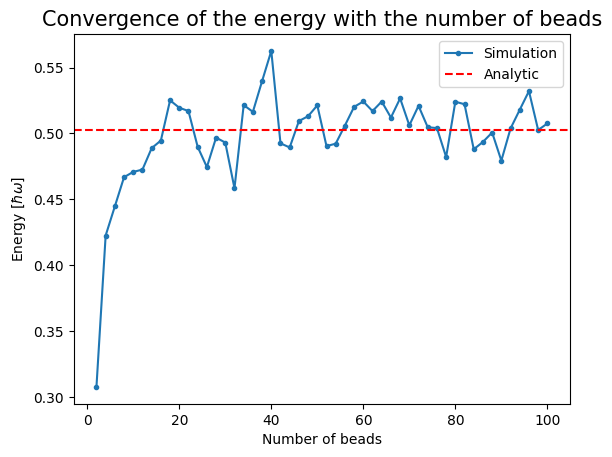

In [20]:
n = 6 # for temperature
Nbids_list = np.arange(2, 101, 2)
beta = n / h_omega
E_list = []
E_analitic = 0.5 / np.tanh(n / 2)

for Nbids in Nbids_list:
    energy_file = "results - beads\A beta = {:.1e} bids = {:}".format(beta, Nbids) + '.erg'
    energy_df = pd.read_csv(energy_file, sep=' ')
    energy = energy_df['E']
    E_list.append(energy.mean())

plt.plot(Nbids_list, np.array(E_list) / h_omega, '.-', label='Simulation')
plt.axhline(E_analitic, ls='--',color='r', label='Analytic')
# plt.vlines(56, 0, 0.6, ls=':', color='g', label='Optimal number of beads')
plt.xlabel('Number of beads')
plt.ylabel('Energy [$\hbar \omega$]')
plt.legend()
plt.title('Convergence of the energy with the number of beads', fontsize=15)
plt.show()

We can see that the energy is converging to the correct groud analytic energy of a quantum harminic oscilator (at 96K) at ~20 bids (on average).

### Temperatures

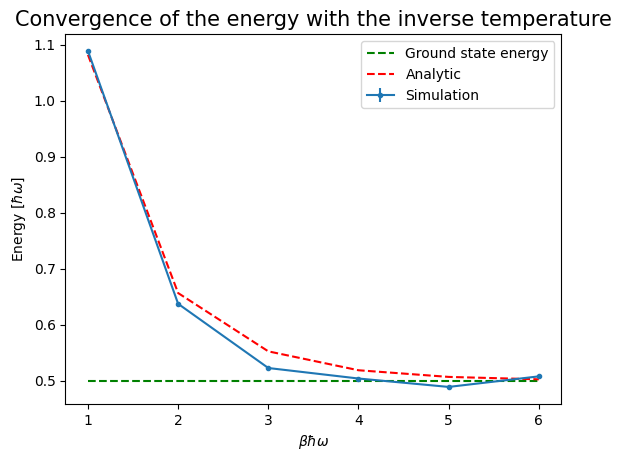

Results Table:


,βℏω,E simulation,std,E analytic,Nσ
0,1,8.723248e-21,3.015456e-22,8.667589e-21,0.184580
1,2,5.105419e-21,1.166796e-22,5.259286e-21,1.318711
2,3,4.186881e-21,1.005899e-22,4.425177e-21,2.368991
3,4,4.036647e-21,7.526519e-23,4.154904e-21,1.571194
4,5,3.916469e-21,2.117404e-22,4.059785e-21,0.676845
5,6,4.067617e-21,9.036099e-23,4.025348e-21,0.467777


In [19]:
N6 = 56
E_list = []
std_list = []
beta_list = np.arange(1,7,1) #/ (hbar * trap_omega)
E_analitic = 1 / 2 * 1 / np.tanh(1 / 2  * np.arange(1,7,1)) #*  hbar * trap_omega 

for n in range(1,7):
    beta = n / (hbar * trap_omega)
    Nbids = int(np.round(N6 * 6 / n / 2) * 2) # Number of beads for n, rounded to the nearest even number
    En_list = []
    for j in range(3):
        energy_file = "results - temps\A beta = {:.1e} bids = {:} run = {:}".format(beta, Nbids,j) + '.erg'
        energy_df = pd.read_csv(energy_file, sep=' ')
        energy = energy_df['E']
        En_list.append(energy.mean())
    E_list.append(np.mean(En_list))
    std_list.append(np.std(En_list))


        
plt.errorbar(beta_list, np.array(E_list) / (hbar * trap_omega)  , yerr=std_list, fmt='.-', label='Simulation')
plt.hlines(1/2  ,beta_list[0],beta_list[-1], ls='--', color = 'g', label='Ground state energy')
plt.plot(beta_list, E_analitic, 'r--', label='Analytic')
plt.xlabel(r'$\beta \hbar \omega$')
plt.ylabel('Energy [$\hbar \omega$]')
plt.legend()
plt.title('Convergence of the energy with the inverse temperature', fontsize=15)
plt.show()

N_sigma = np.abs(np.array(E_list) - E_analitic * hbar * trap_omega) / np.array(std_list)
print("Results Table:")
results = pd.DataFrame({'βℏω': beta_list, 'E simulation': E_list, 'std': std_list, 'E analytic': E_analitic * hbar * trap_omega, 'Nσ': N_sigma})
display(results)

We can see that the numerical result holds (for the most part) the same trend and values as the analytic energy, and they both converge at a low enough temprature (high $\beta$) to the correct groud state energy of a quantum harmonic oscilator - $\frac{1}{2}\hbar\omega$.

### Movment GIF

In [ ]:
step_end = 2000
pos_df = pd.read_csv('results - temps\A beta = 1.2e+20 bids = 336 run = 1.xyz', sep=' ')
pos_df = pos_df[pos_df['step'] < step_end]

pos_df2 = pd.read_csv('results - temps\A beta = 7.5e+20 bids = 56 run = 1.xyz', sep=' ')
pos_df2 = pos_df2[pos_df2['step'] < step_end]

import matplotlib.animation as animation

def create_gif(pos_df, pos_df2, filename='beads_movement2.gif'):
    fig, ax = plt.subplots()
    ax.set_xlim(min(pos_df['x'].min(), pos_df2['x'].min()), max(pos_df['x'].max(), pos_df2['x'].max()))
    ax.set_ylim(-1, 1)
    ax.set_yticks([])  # Hide y-axis numbers
    line1, = ax.plot([], [], 'o-', lw=2, label=r'Beads | $\beta = 1/\hbar \omega_{0}$', color='blue')
    line2, = ax.plot([], [], 'o-', lw=2, label=r'Beads | $\beta = 6/\hbar \omega_{0}$ ', color='orange')
    center_of_mass_dot1, = ax.plot([], [], 'ro', label=r'Center of Mass | $\beta = 1/\hbar \omega_{0}$')
    center_of_mass_dot2, = ax.plot([], [], 'go', label=r'Center of Mass | $\beta = 6/\hbar \omega_{0}$')
    
    ax.set_title('Beads Movement Over Time', fontsize=15)
    ax.set_xlabel('Position (m)')
    ax.legend(loc='best')

    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        center_of_mass_dot1.set_data([], [])
        center_of_mass_dot2.set_data([], [])
        return line1, line2, center_of_mass_dot1, center_of_mass_dot2

    def update(frame):
        data1 = pos_df[pos_df['step'] == frame]
        data2 = pos_df2[pos_df2['step'] == frame]
        line1.set_data(data1['x'], np.ones(len(data1)) * -0.5)
        line2.set_data(data2['x'], np.ones(len(data2)) * 0)
        center_of_mass1 = data1['x'].mean()
        center_of_mass2 = data2['x'].mean()
        center_of_mass_dot1.set_data(center_of_mass1, -0.5)
        center_of_mass_dot2.set_data(center_of_mass2, 0)
        return line1, line2, center_of_mass_dot1, center_of_mass_dot2

    ani = animation.FuncAnimation(fig, update, frames=pos_df['step'].unique(), init_func=init, blit=True)
    ani.save(filename, writer='imagemagick')

create_gif(pos_df, pos_df2)

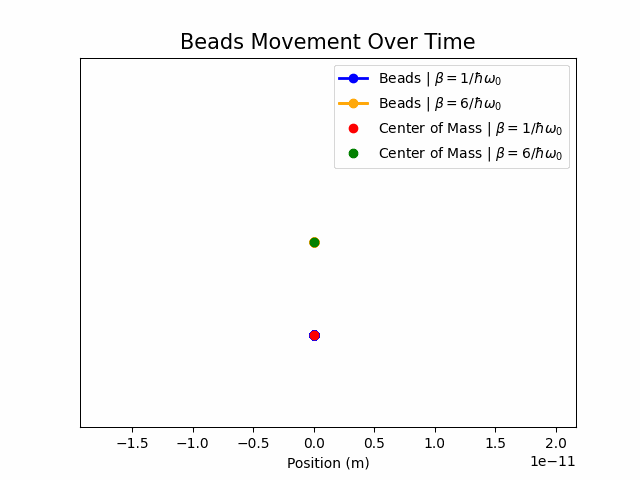

In [4]:
Image(filename='beads_movement2.gif')

This GIF displays the movement of the beads and their center of mass at the two most extreme tempratures that we ran the simulation at. \
As can be seen, for the higher temprature the beads tend to move more which aligns with the expression for the "inner" omega between the beads 
$$
\omega_{P} = \frac{P}{\beta\hbar},
$$
With $n$ being the number of particles. As the temperature increases ($\beta$ decreases) the higher value $\omega$ obtains, which allows for an increased movement of the beads.